# Чёрный уровень

## График

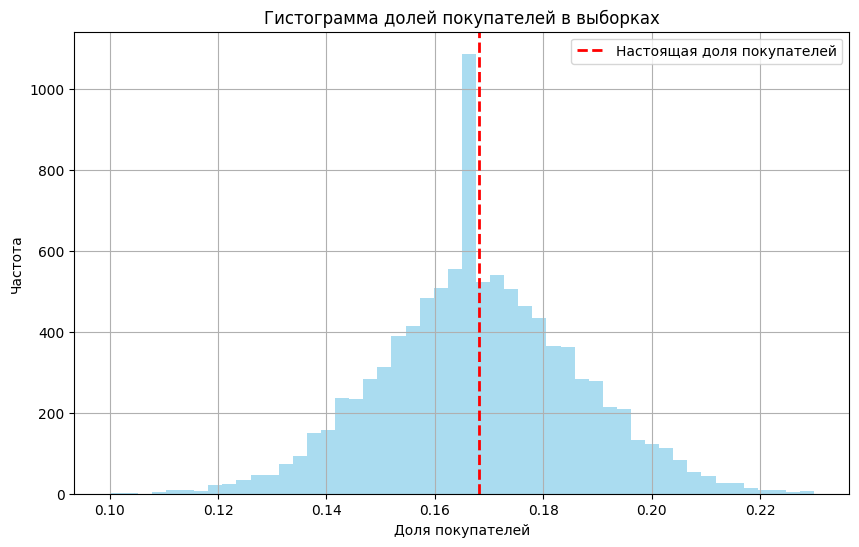

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из реального датасета
data = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/ark.csv')

# Параметры симуляции
sample_size = 400
repeats = 10000
purchase_rates = []

# Настоящая доля покупателей
true_purchase_rate = (data['Purchased'] == 'Yes').mean()

# Симуляция
for _ in range(repeats):
    sample = data.sample(n=sample_size)
    purchase_rate_sample = (sample['Purchased'] == 'Yes').mean()
    purchase_rates.append(purchase_rate_sample)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(purchase_rates, bins=50, color='skyblue', alpha=0.7)
plt.axvline(x=true_purchase_rate, color='red', linestyle='dashed', linewidth=2, label='Настоящая доля покупателей')
plt.title('Гистограмма долей покупателей в выборках')
plt.xlabel('Доля покупателей')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

# Красный уровень

## График

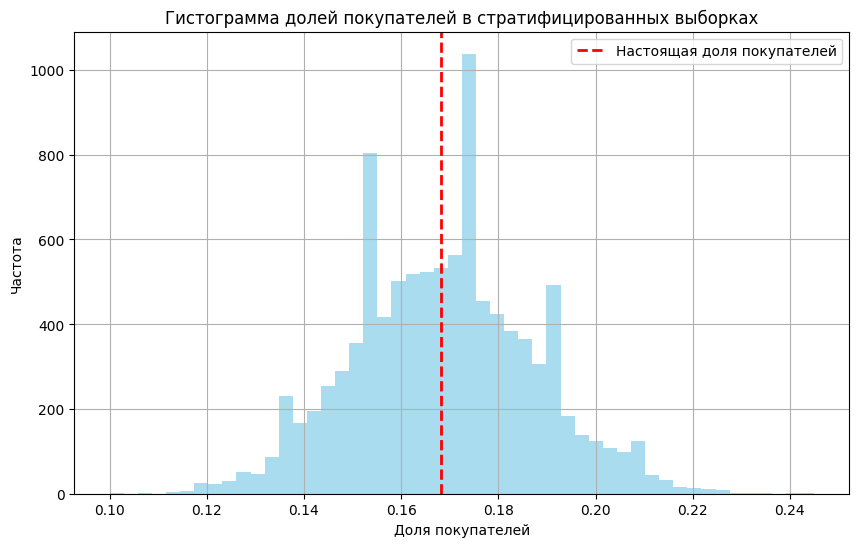

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/ark.csv')

# Параметры симуляции
sample_size_per_stratum = 200  # Количество выборок из каждой страты
repeats = 10000
purchase_rates = []

# Настоящая доля покупателей
true_purchase_rate = (data['Purchased'] == 'Yes').mean()

# Получаем страты по полу
strata = data['Gender'].unique()

# Симуляция стратифицированной выборки
for _ in range(repeats):
    sample = pd.DataFrame()
    for stratum in strata:
        stratum_data = data[data['Gender'] == stratum]
        sample_stratum = stratum_data.sample(n=sample_size_per_stratum, replace=True)
        sample = pd.concat([sample, sample_stratum])

    purchase_rate_sample = (sample['Purchased'] == 'Yes').mean()
    purchase_rates.append(purchase_rate_sample)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(purchase_rates, bins=50, color='skyblue', alpha=0.7)
plt.axvline(x=true_purchase_rate, color='red', linestyle='dashed', linewidth=2, label='Настоящая доля покупателей')
plt.title('Гистограмма долей покупателей в стратифицированных выборках')
plt.xlabel('Доля покупателей')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

# Чёрный уровень

## График

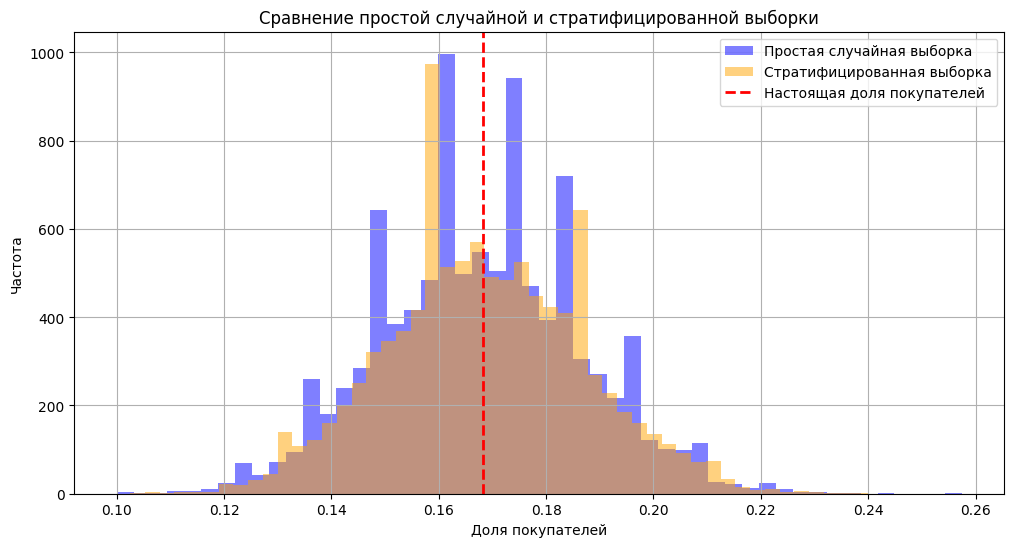

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/ark.csv')

# Параметры симуляции
sample_size = 400
repeats = 10000
purchase_rates_simple = []
purchase_rates_stratified = []

# Настоящая доля покупателей
true_purchase_rate = (data['Purchased'] == 'Yes').mean()

# Симуляция простой случайной выборки
for _ in range(repeats):
    sample_simple = data.sample(n=sample_size)
    purchase_rate_simple = (sample_simple['Purchased'] == 'Yes').mean()
    purchase_rates_simple.append(purchase_rate_simple)

# Симуляция стратифицированной выборки
strata = data['Gender'].unique()
sample_size_per_stratum = sample_size // len(strata)

for _ in range(repeats):
    sample_stratified = pd.DataFrame()
    for stratum in strata:
        stratum_data = data[data['Gender'] == stratum]
        sample_stratum = stratum_data.sample(n=sample_size_per_stratum, replace=True)
        sample_stratified = pd.concat([sample_stratified, sample_stratum])
    purchase_rate_stratified = (sample_stratified['Purchased'] == 'Yes').mean()
    purchase_rates_stratified.append(purchase_rate_stratified)

# Построение гистограммы
plt.figure(figsize=(12, 6))
plt.hist(purchase_rates_simple, bins=50, alpha=0.5, label='Простая случайная выборка', color='blue')
plt.hist(purchase_rates_stratified, bins=50, alpha=0.5, label='Стратифицированная выборка', color='orange')
plt.axvline(x=true_purchase_rate, color='red', linestyle='dashed', linewidth=2, label='Настоящая доля покупателей')
plt.title('Сравнение простой случайной и стратифицированной выборки')
plt.xlabel('Доля покупателей')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()